In [55]:
library(tidyverse)
library(tidymodels)

In [56]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))






Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [57]:
cleveland_select <- cleveland |> select(X2, X3, X5, X4, X14)
column_names <- c("sex", "chest_pain_type", "serum_cholesterol", "resting_blood_pressure", "heart_disease_present")
colnames(cleveland_select) <- column_names
cleveland_select$heart_disease_present[cleveland_select$heart_disease_present > 1] <- 1

cleveland_select

sex,chest_pain_type,serum_cholesterol,resting_blood_pressure,heart_disease_present
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,233,145,0
1,4,286,160,1
1,4,229,120,1
1,3,250,130,0
0,2,204,130,0
1,2,236,120,0
0,4,268,140,1
0,4,354,120,0
1,4,254,130,1


In [88]:
cleveland_f <- cleveland_select |> 
mutate(hdp = as_factor(heart_disease_present))
cleveland_fuck <- cleveland_f |> 
mutate(sex = as_factor(sex))

cleveland_fuck

sex,chest_pain_type,serum_cholesterol,resting_blood_pressure,heart_disease_present,hdp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,233,145,0,0
1,4,286,160,1,1
1,4,229,120,1,1
1,3,250,130,0,0
0,2,204,130,0,0
1,2,236,120,0,0
0,4,268,140,1,1
0,4,354,120,0,0
1,4,254,130,1,1


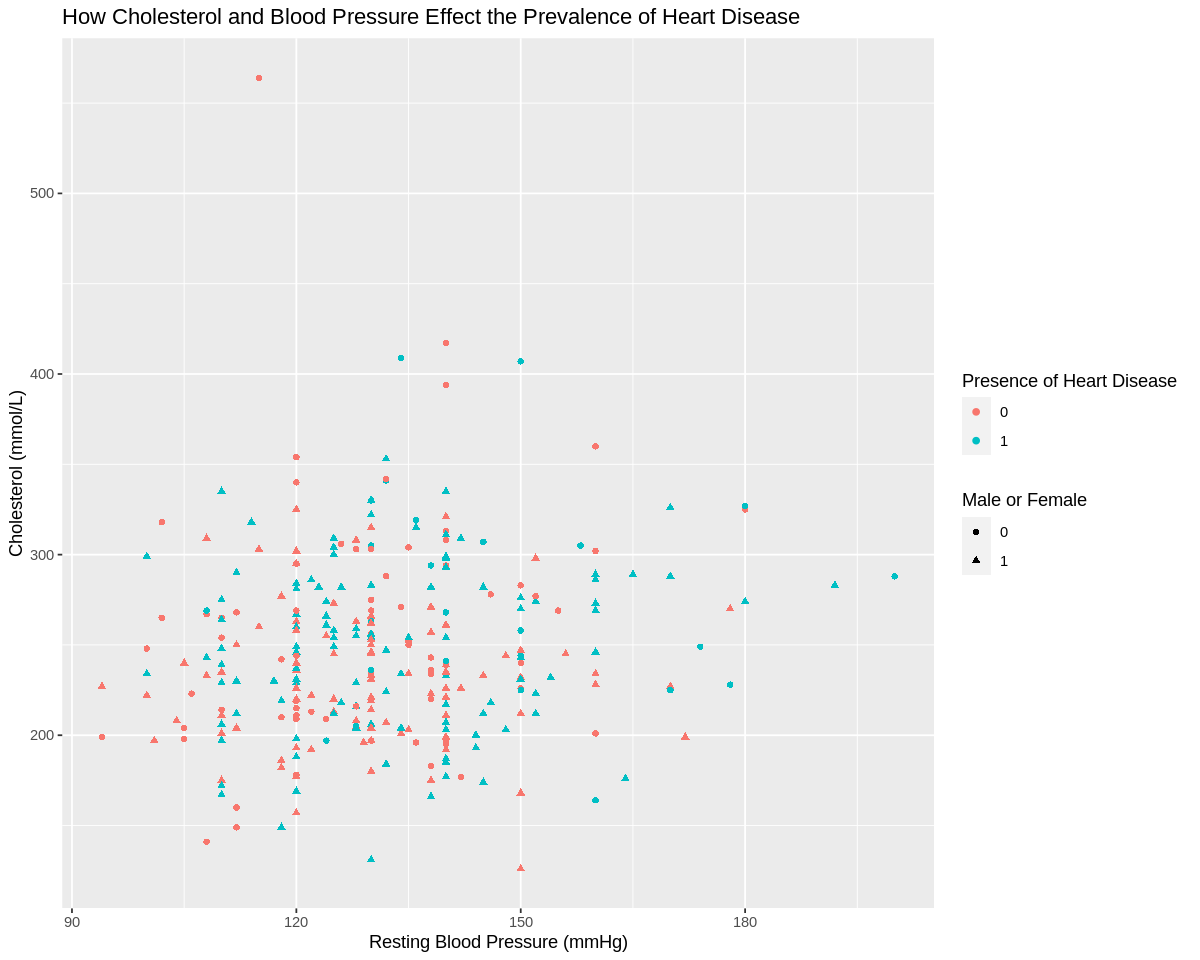

In [91]:

options(repr.plot.width = 10, repr.plot.height = 8)
cleveland_plot <- cleveland_fuck |> 
ggplot(aes( x = resting_blood_pressure, y = serum_cholesterol, color = hdp, shape = sex)) +
geom_point() +
labs(x = "Resting Blood Pressure (mmHg)", y = "Cholesterol (mmol/L)", color = "Presence of Heart Disease", shape = "Male or Female") +
ggtitle("How Cholesterol and Blood Pressure Effect the Prevalence of Heart Disease")


cleveland_plot